In [1]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent /"src"
sys.path.append(str(src_path))
import data_functions
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pickle
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [3]:
strict_pickle_path = src_path / 'strict_pre_pipeline_AD.pkl'
#loose_pickle_path = src_path / 'loose_pre_pipeline.pkl'

In [37]:
import matplotlib.pyplot as plt

In [4]:
file = open(strict_pickle_path, 'rb')
saved_model = pickle.load(file)
file.close()

In [23]:
from sklearn.linear_model import LogisticRegression

In [5]:
#file_loose =open(loose_pickle_path,'rb')
#loose_model=pickle.load(file_loose)
#file.close()

In [5]:
X_train, X_test, y_train = data_functions.get_dataframes()

In [6]:
X_train_val, X_test_val, y_train_val, y_test_val= train_test_split(X_train, y_train, random_state=2020)

In [7]:
X_train_val_trans = saved_model.transform(X_train_val)

In [10]:
#pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,625,626,627,628,629,630,631,632,633,634
0,6000.0,1390.0,109.0,1999.0,1999.000000,21.0,1.895665,1.041252,-0.150399,0.733857,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1399.0,280.0,2010.0,2010.000000,10.0,-0.105970,1.054237,0.212290,0.745416,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,686.0,250.0,2009.0,2009.000000,11.0,-0.097630,0.025541,0.148660,0.744365,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,263.0,58.0,1986.0,1986.000000,34.0,-0.105970,-0.584751,-0.258570,0.720196,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1996.814686,0.0,-0.105970,-0.964200,-0.381587,-1.366788,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210.0,125.0,1999.0,1999.000000,21.0,-0.102634,0.781553,-0.116463,0.733857,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59396,4700.0,1212.0,56.0,1996.0,1996.000000,24.0,1.461977,0.784439,-0.262812,0.730704,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59397,0.0,0.0,0.0,0.0,1996.814686,0.0,-0.105970,-0.964200,-0.381587,-1.366788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59398,0.0,0.0,0.0,0.0,1996.814686,0.0,-0.105970,-0.964200,-0.381587,-1.366788,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:

rf = RandomForestClassifier()
#final_model = make_pipeline(rf)
#cross_val_score(rf, X_train_val_trans, y_train_val['status_group'], cv = 5)

In [10]:
rf.fit(X_train_val_trans,y_train_val['status_group'])
y_pred_rf= rf.predict(X_train_val_trans)

In [14]:
#knn.fit(x_train,y_train['status_group'])
#y_pred=knn.predict(x_train)

In [11]:
print(classification_report(y_train_val,y_pred_rf))

                         precision    recall  f1-score   support

             functional       0.93      0.98      0.96     24249
functional needs repair       0.90      0.78      0.84      3165
         non functional       0.97      0.93      0.95     17136

               accuracy                           0.95     44550
              macro avg       0.94      0.90      0.92     44550
           weighted avg       0.95      0.95      0.94     44550



In [26]:
X_test_val_trans= saved_model.transform(X_test_val)

In [27]:
y_test_pred_rf=rf.predict(X_test_val_trans)

In [14]:
print(classification_report(y_test_val, y_test_pred_rf))

                         precision    recall  f1-score   support

             functional       0.79      0.87      0.83      8010
functional needs repair       0.52      0.33      0.40      1152
         non functional       0.82      0.76      0.79      5688

               accuracy                           0.79     14850
              macro avg       0.71      0.65      0.67     14850
           weighted avg       0.78      0.79      0.78     14850



In [19]:
print(classification_report(y_train_val, y_forest_pred))

                         precision    recall  f1-score   support

             functional       0.93      0.98      0.95     32259
functional needs repair       0.90      0.78      0.84      4317
         non functional       0.97      0.93      0.95     22824

               accuracy                           0.94     59400
              macro avg       0.93      0.90      0.91     59400
           weighted avg       0.94      0.94      0.94     59400



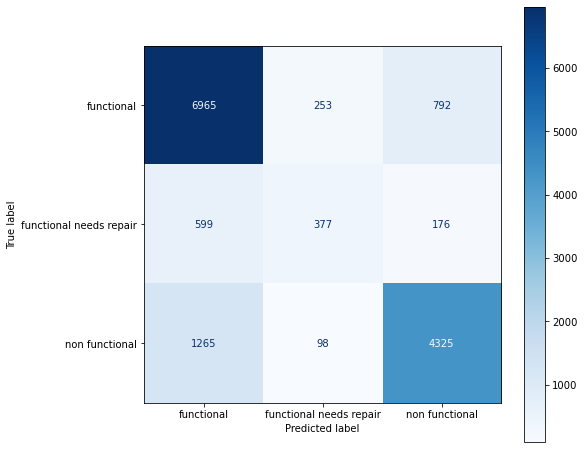

In [39]:
fig, ax= plt.subplots(figsize=(8,8))
plot_confusion_matrix(rf,X_test_val_trans,y_test_val, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [32]:
knn=KNeighborsClassifier()

In [33]:
knn.fit(X_train_val_trans,y_train_val['status_group'])


KNeighborsClassifier()

In [42]:
y_test_pred_knn = knn.predict(X_test_val_trans)

In [43]:
print(classification_report(y_test_val, y_test_pred_knn))

                         precision    recall  f1-score   support

             functional       0.69      0.82      0.75      8010
functional needs repair       0.41      0.20      0.27      1152
         non functional       0.70      0.60      0.65      5688

               accuracy                           0.69     14850
              macro avg       0.60      0.54      0.56     14850
           weighted avg       0.68      0.69      0.67     14850



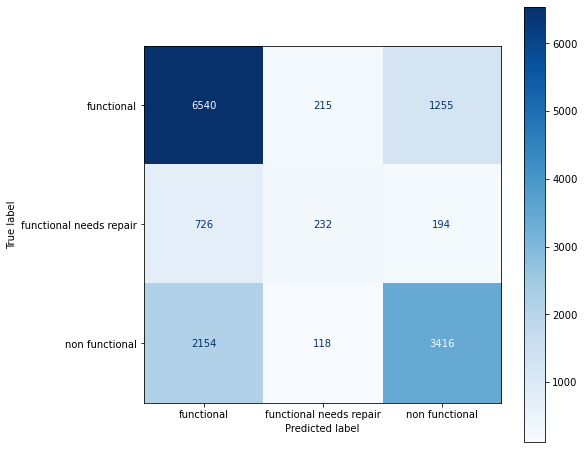

In [44]:
fig, ax= plt.subplots(figsize=(8,8))
plot_confusion_matrix(knn,X_test_val_trans,y_test_val, cmap=plt.cm.Blues, ax=ax)
plt.show()